In [2]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import padasip as pa

%matplotlib inline

from sklearn.metrics import mean_squared_error
import datetime

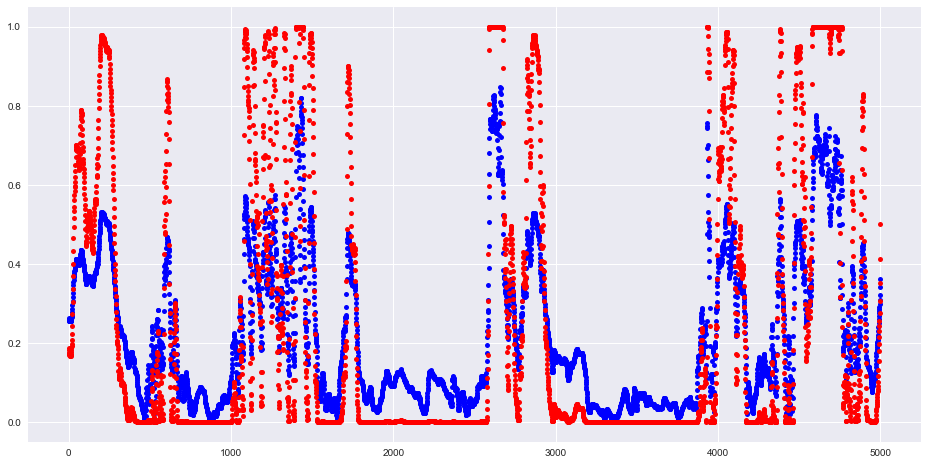

In [12]:
# Loading data from dataset
plt.style.use('seaborn')
data = pd.read_csv('dataset.csv',index_col=0)
x = data['0'].values.flatten()
y = data['1'].values.flatten()
plt.figure(figsize=[16,8])
x = x[:100000]/max(x[:100000])  #normalisation
y = y[:100000]/max(y[:100000])  #normalisation
plt.plot(x[:5000],color = 'b',marker = 'o',linestyle = '',markersize = 5)
plt.plot(y[:5000],color = 'r',marker = 'o',linestyle = '',markersize = 5)

mu = 0.1 completed
mu = 0.01 completed
mu = 0.001 completed
mu = 0.0001 completed
mu = 1e-05 completed


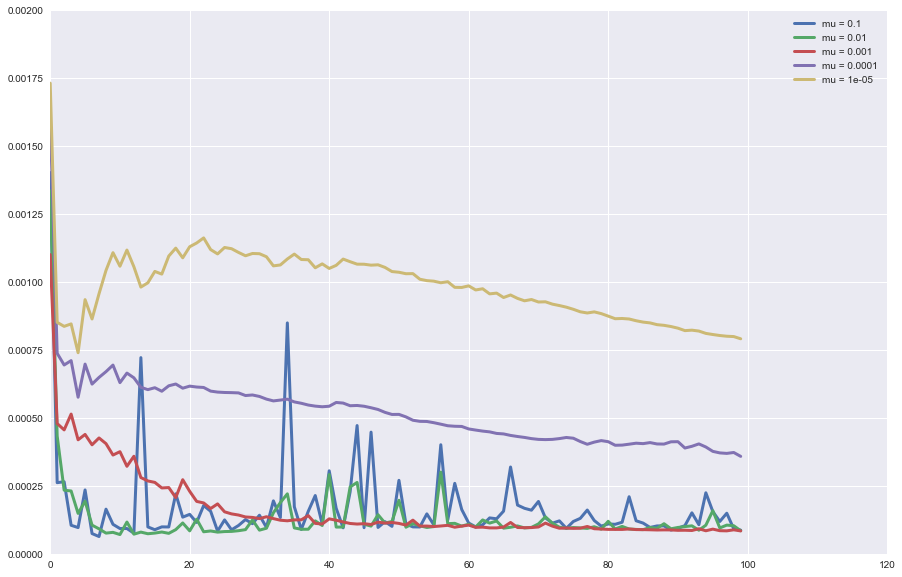

In [3]:
#Implementing LMS algorithm and effect of mu on the MSE and accuracy
llim = 0
ulim = 100000
step_size = 1000
test_lim=200
mu = [0.1,0.01,0.001,0.0001,0.00001]
error_mu = []

plt.figure(figsize=[13,9])
plt.ylim(0,0.0020)

for m in mu:
    
    error = []
    f = pa.filters.FilterLMS(n=2, mu=m, w="zeros")
    
    for k in range(llim, ulim, step_size): 
        
        for i in range(k, k+step_size):
            f.adapt(y[i], np.array([1,x[i]]))
        yhat = []
        for i in range(k+test_lim):
            yhat.append(np.dot(f.w,np.array([1,x[i]])))
        yhat = np.array(yhat)
        error.append(mean_squared_error(y[:k+test_lim],yhat)/test_lim) 
        
    error = np.array(error)
    error_mu.append(error)
    plt.plot(error,label = "mu = {}".format(m),linewidth=3)
    plt.axis([0,120,0,0.0020])
    print("mu = {} completed".format(m))
plt.legend(loc='upper right')

In [4]:
for i in range(len(error_mu)):
    pd.DataFrame(error_mu[i]).to_csv('lms_error_mu_{}.csv'.format(mu[i]))

[0, 100, 0, 0.0015]

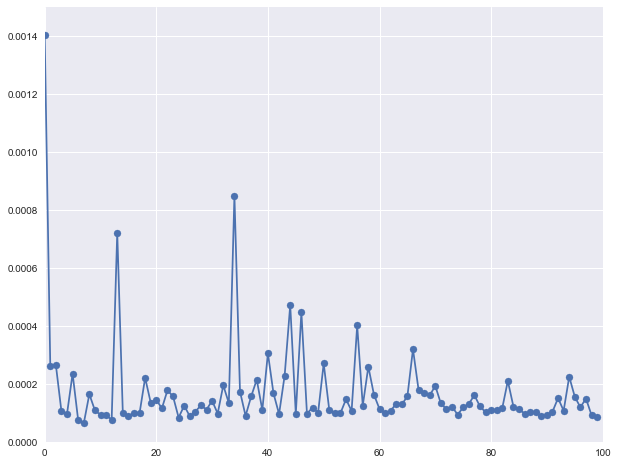

In [16]:
d_a = pd.read_csv('lms_error_mu_0.1.csv')

plt.figure(figsize = [10,8])

plt.scatter(d_a.iloc[:,0], d_a.iloc[:,1])
plt.plot(d_a.iloc[:,0], d_a.iloc[:,1])

plt.axis([0,100,0,0.0015])

mu = 0.1 completed


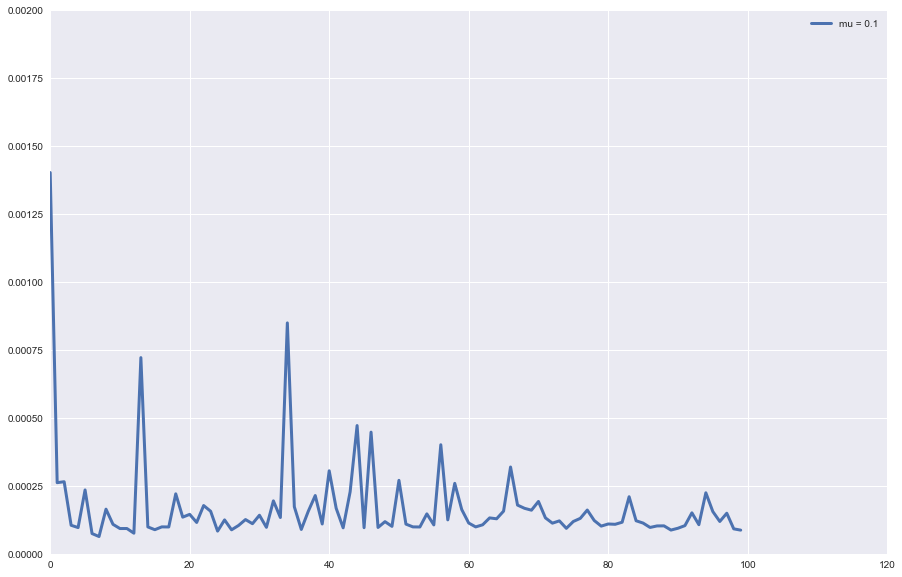

In [10]:
#Implementing LMS algorithm and effect of mu on the MSE and accuracy
llim = 0
ulim = 100000
step_size = 1000
test_lim=200
mu = [0.1]
error_mu = []

plt.figure(figsize=[15,10])
plt.ylim(0,0.0020)

for m in mu:
    
    error = []
    f = pa.filters.FilterLMS(n=2, mu=m, w="zeros")
    
    for k in range(llim, ulim, step_size): 
        
        for i in range(k, k+step_size):
            f.adapt(y[i], np.array([1,x[i]]))
        yhat = []
        for i in range(k+test_lim):
            yhat.append(np.dot(f.w,np.array([1,x[i]])))
        yhat = np.array(yhat)
        error.append(mean_squared_error(y[:k+test_lim],yhat)/test_lim) 
        
    error = np.array(error)
    error_mu.append(error)
    plt.plot(error,label = "mu = {}".format(m),linewidth=3)
    plt.axis([0,120,0,0.0020])
    print("mu = {} completed".format(m))
plt.legend(loc='upper right')